In [1]:
import json
import pandas as pd

from NewsBiasClustering import NewsBiasClusteringFromMetrics

0.9237
0.40329


In [2]:
print('Loading File')
file = open('rust-articles-backup-metrics.json', encoding='utf8')
articles = pd.DataFrame.from_dict(json.load(file))
print('File Loaded')

Loading File
File Loaded


metro
Counter({0: 8817, 1: 6672})


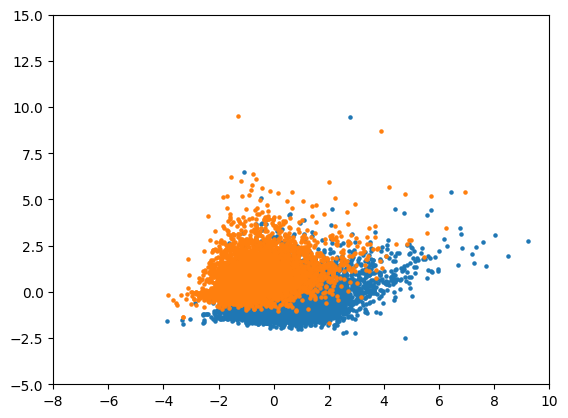

bbc
Counter({0: 5759, 1: 5159})


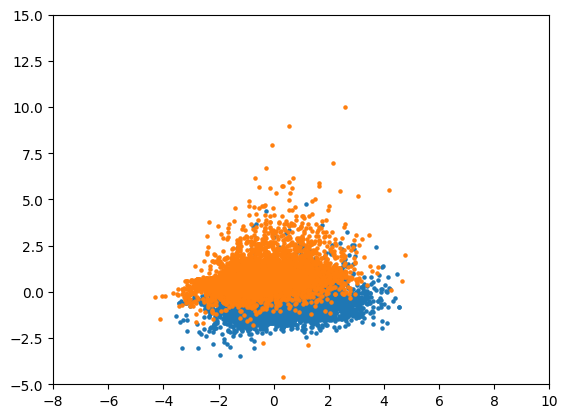

sky
Counter({0: 2642, 2: 1755, 1: 1147, 3: 439, 4: 2})


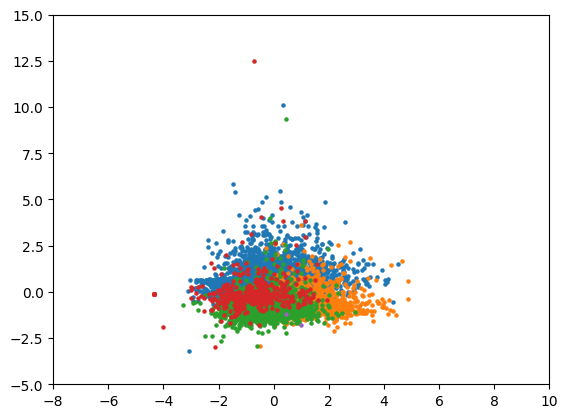

theguardian
Counter({1: 7889, 0: 6706})


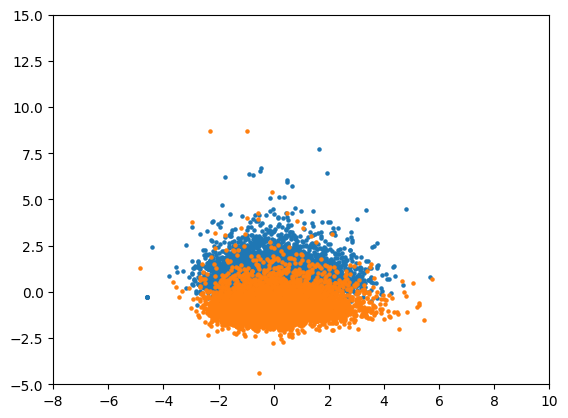

sun
Counter({0: 10750, 2: 10024, 1: 6426, 3: 5264})


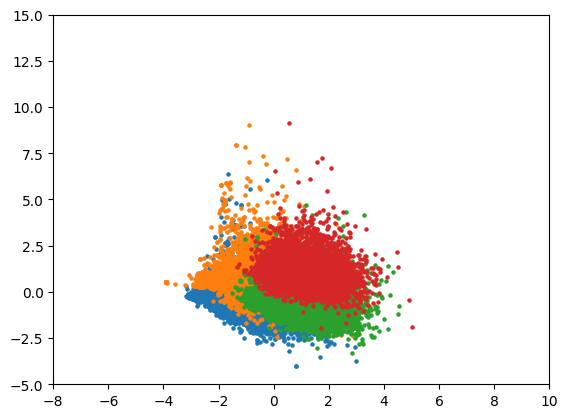

dailymail
Counter({1: 27523, 0: 24808})


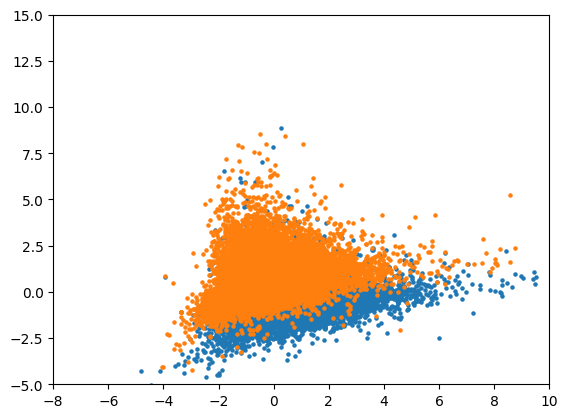

independent
Counter({1: 9016, 0: 6555})


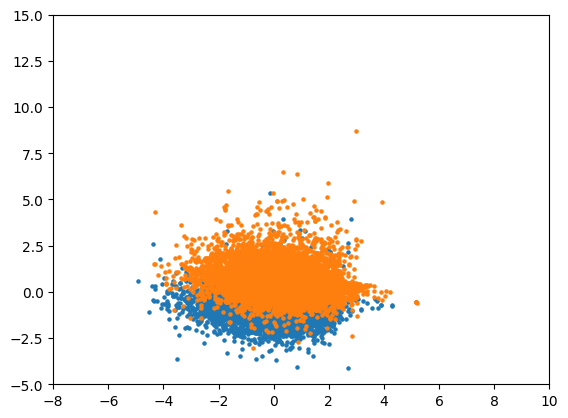

mirror
Counter({1: 7330, 0: 6542})


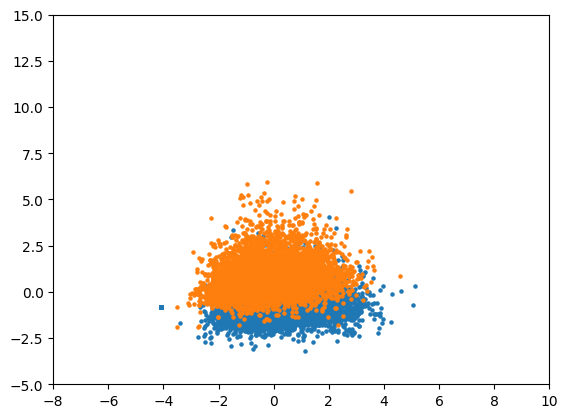

In [3]:
for publisher in list(set(articles['publisher'])):
    print(publisher)
    publisherArticles = articles[articles['publisher'] == publisher].reset_index(drop=True)
    metrics = []
    for i in range(len(publisherArticles)):
        sentiment = publisherArticles.iloc[i]['sentiment']
        quoteBased = publisherArticles.iloc[i]['quoteBased']
        sensationalized = publisherArticles.iloc[i]['sensationalized']#**(1/1.5)
        mudslinging = publisherArticles.iloc[i]['mudslinging']
        spin = publisherArticles.iloc[i]['spin']
        informal = publisherArticles.iloc[i]['informal']
        metrics.append([sentiment, quoteBased, sensationalized, mudslinging, spin, informal])
    NewsBiasClusteringFromMetrics(metrics, threshold=0.32)

In [4]:
articles.filter(['body','sentiment','quoteBased','sensationalized','mudslinging','spin','informal'])

,body,sentiment,quoteBased,sensationalized,mudslinging,spin,informal
0,"More than 100 migrants, including seven childr...",0.30910,0.51423,0.00000,0.09183,0.00000,0.26899
1,At least 11 people have died after drinking co...,0.53860,0.16694,0.00000,0.20868,0.20868,0.22966
2,"Jeremy Corbyn has made Labour a ""welcoming ref...",0.98600,1.00000,0.00000,0.03080,0.03080,0.33832
3,Thirteen French soldiers fighting Islamist ins...,0.00335,0.40527,0.00000,0.25329,0.00000,0.28566
4,The British Medical Association is asking its ...,0.97770,0.27697,0.00000,0.03462,0.00000,0.35310
...,...,...,...,...,...,...,...
161220,KHABIB NURMAGOMEDOV'S UFC lightweight title de...,0.95210,0.31696,0.00000,0.08804,0.35217,0.27337
161221,A WOMAN has been slammed after demanding her s...,0.99560,0.42439,0.09769,0.02306,0.13839,0.57844
161222,FOR anyone who's been fortunate enough to take...,0.99725,0.00000,0.06654,0.00000,0.04713,0.36295
161223,RITA Ora has been blasted for seeing out the v...,0.96320,0.47031,0.27665,0.00000,0.00000,0.50512
